<a href="https://colab.research.google.com/github/venkateswara489/Machine-learning/blob/main/LAB7_AP23110011489.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN-1**

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 41.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('multiclass.csv')
print(df.head(10))
print(df.info())

   Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669   9656     7561     214              2674        1338      2
1       3   7057   9810     9568    1762              3293        1776      2
2       3   6353   8808     7684    2405              3516        7844      2
3       3  13265   1196     4221    6404               507        1788      1
4       3  22615   5410     7198    3915              1777        5185      1
5       3   9413   8259     5126     666              1795        1451      3
6       3  12126   3199     6975     480              3140         545      3
7       3   7579   4956     9426    1669              3321        2566      2
8       3   5963   3648     6192     425              1716         750      3
9       3   6006  11093    18881    1159              7425        2098      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count 

In [ ]:
df=df.drop_duplicates().reset_index(drop=True)
print(df.isna().sum())
col=df.columns
print(col)

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64
Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'class'],
      dtype='object')


In [ ]:
print(col)

Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'class'],
      dtype='object')


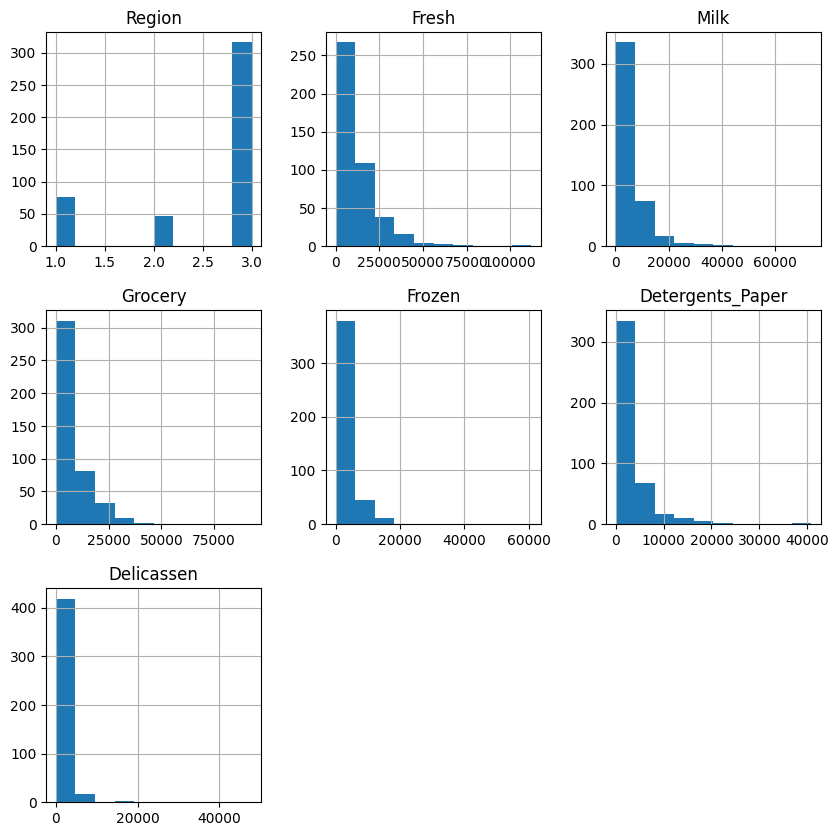

In [ ]:
df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].hist(figsize=(10,10))
plt.show()

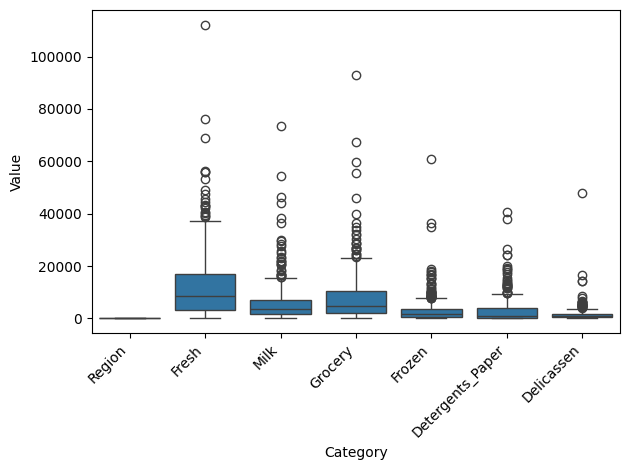

In [ ]:
df_melted = df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].melt(var_name='Category', value_name='Value')
sns.boxplot(x='Category', y='Value', data=df_melted)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Remove outliers using IQR
Q1 = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].quantile(0.25)
Q3 = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[~((df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']] < lower_bound) | (df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']] > upper_bound)).any(axis=1)]

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")

Original number of rows: 440
Number of rows after outlier removal: 332


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target using the cleaned data
X_cleaned = df_cleaned.drop('class', axis=1)
y_cleaned = df_cleaned['class']

# Scale features
scaler = StandardScaler()
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

In [ ]:
from sklearn.model_selection import train_test_split

# Split cleaned and scaled data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_scaled_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [ ]:
from collections import Counter

def euclidean_distance(x1, x2):
    """Calculates the Euclidean distance between two points."""
    return np.sqrt(np.sum((x1 - x2)**2))

def predict_knn(X_train, y_train, x_test, k):
    """Predicts the class for a single test sample using KNN."""
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train.iloc[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

def knn_predict(X_train, y_train, X_test, k):
    """Predicts the class for multiple test samples using KNN."""
    predictions = [predict_knn(X_train, y_train, x_test, k) for x_test in X_test]
    return np.array(predictions)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5) # You can change the number of neighbors (k)

# Train the model using cleaned data
knn_model.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the test set using cleaned data
y_pred_cleaned = knn_model.predict(X_test_cleaned)

# Evaluate the model using cleaned data
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
report_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

print(f"Accuracy with cleaned data: {accuracy_cleaned}")
print("Classification Report with cleaned data:\n", report_cleaned)

Accuracy with cleaned data: 0.8955223880597015
Classification Report with cleaned data:
               precision    recall  f1-score   support

           1       0.77      0.91      0.83        11
           2       0.95      0.83      0.88        23
           3       0.91      0.94      0.93        33

    accuracy                           0.90        67
   macro avg       0.88      0.89      0.88        67
weighted avg       0.90      0.90      0.90        67



k: 1, Accuracy: 0.8059701492537313
k: 3, Accuracy: 0.8656716417910447
k: 5, Accuracy: 0.8955223880597015
k: 7, Accuracy: 0.8955223880597015
k: 9, Accuracy: 0.8955223880597015
k: 11, Accuracy: 0.8805970149253731
k: 13, Accuracy: 0.8805970149253731
k: 15, Accuracy: 0.8805970149253731
k: 17, Accuracy: 0.8507462686567164
k: 19, Accuracy: 0.8507462686567164


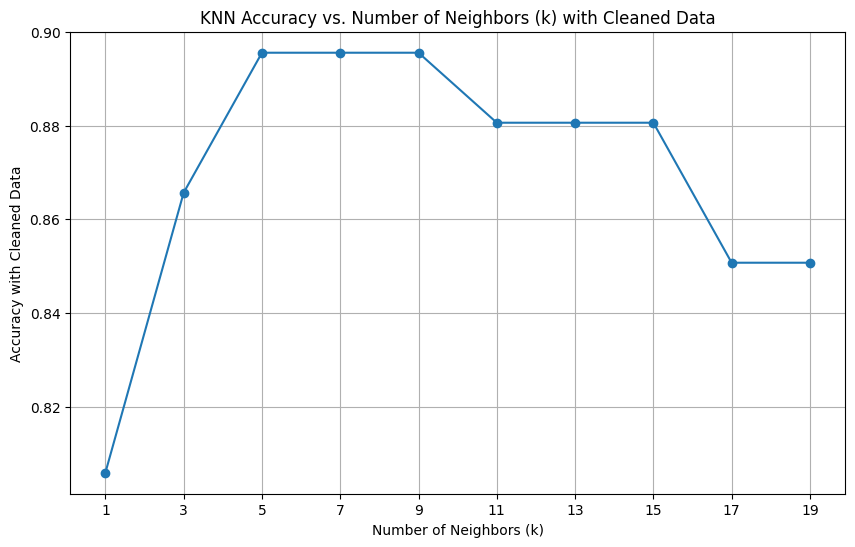


Best k with cleaned data: 5
Highest Accuracy with cleaned data: 0.8955223880597015


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find optimal k for KNN using cleaned data
accuracy_scores_cleaned = []
k_values = range(1, 21, 2)  # Test odd k from 1 to 20

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_cleaned, y_train_cleaned)
    y_pred_k_cleaned = knn_model.predict(X_test_cleaned)
    accuracy_k_cleaned = accuracy_score(y_test_cleaned, y_pred_k_cleaned)
    accuracy_scores_cleaned.append(accuracy_k_cleaned)
    print(f"k: {k}, Accuracy: {accuracy_k_cleaned}")

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores_cleaned, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy with Cleaned Data')
plt.title('KNN Accuracy vs. Number of Neighbors (k) with Cleaned Data')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k with cleaned data
best_k_cleaned = k_values[accuracy_scores_cleaned.index(max(accuracy_scores_cleaned))]
print(f"\nBest k with cleaned data: {best_k_cleaned}")
print(f"Highest Accuracy with cleaned data: {max(accuracy_scores_cleaned)}")

# KNN IMPUTATION

In [ ]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 35.7MB/s]


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

In [ ]:
df=pd.read_csv('knn_imputation.csv',index_col=0)
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [ ]:
df.isna().sum()

,0
Region,8
Fresh,13
Milk,15
Grocery,9
Frozen,8
Detergents_Paper,10
Delicassen,11


In [ ]:
X=df

In [ ]:
imputer=KNNImputer(n_neighbors=3)
X=imputer.fit_transform(X)

In [ ]:
pd.DataFrame(X,columns=df.columns).isna().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
